# Integrals Involving Parameters
Author - Dibyajyoti Chakraborty

In [1]:
import torch                    
import matplotlib.pyplot as plt
import numpy as np
import time
import DNNI
torch.set_default_tensor_type(torch.DoubleTensor)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


$$\int e^{ax}sin(ax) \,dx$$
Change the condition in the NNI class

In [6]:
def f(X):
    x=X[:,[0]]
    a=X[:,[1]]
    return torch.exp(a*x)*torch.sin(a*x)

In [7]:
x = np.linspace(0,1,100)
a = np.linspace(0,1,100)
X,A = np.meshgrid(x,a)
x_train = torch.from_numpy(np.hstack((X.flatten()[:,None], A.flatten()[:,None]))).to(device)
x_train.shape

torch.Size([10000, 2])

In [8]:
steps=5000
layers = np.array([2,10,10,10,1])
inn = DNNI.DNNI(layers,device)
inn.to(device)
inn.closure(steps=steps,x_train=x_train,int_f=f)

  0%|▊                                                                                                                                                                   | 23/5000 [00:00<00:45, 109.61it/s]

Iter:  0 Loss:  3.224327532199911  lr:  0.01


 26%|█████████████████████████████████████████▎                                                                                                                        | 1276/5000 [00:05<00:16, 222.06it/s]

Iter:  1250 Loss:  1.694738770121264e-05  lr:  0.002


 51%|██████████████████████████████████████████████████████████████████████████████████▎                                                                               | 2540/5000 [00:11<00:11, 220.46it/s]

Iter:  2500 Loss:  4.3890970391585375e-06  lr:  0.0004


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 3785/5000 [00:17<00:05, 230.13it/s]

Iter:  3750 Loss:  2.793760835484012e-06  lr:  8e-05


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:22<00:00, 221.55it/s]

MSE :  2.1668686038240196e-06


In [9]:
a_test = 0.5*torch.ones(10)
x_test = torch.linspace(0,1,10)
x_t = torch.hstack((x_test[:,None],a_test[:,None])).to(device)
x_t.shape

torch.Size([10, 2])

In [10]:
y = inn(x_t).detach().cpu().numpy()
y_th = (torch.exp(0.5*x_test)*(torch.sin(0.5*x_test)-torch.cos(0.5*x_test))).detach().cpu().numpy()

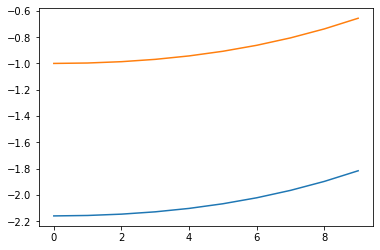

In [11]:
plt.plot(y)
plt.plot(y_th)
# Shifted plots because of an arbitrary constant. Can be subtracted .

In [12]:
print(y_th[0]-y_th[-1])

-0.34355004662944566


In [13]:
print(y[0]-y[-1])

[-0.34332616]


# Perimeter of ellipse
$$ 	4 \int \sqrt{a^2-(a^2-b^2)sin^2(\theta)} \,d\theta$$

In [17]:
def f2(X):
    x = X[:,[0]]
    a = X[:,[1]]
    b = X[:,[2]]
    e = torch.sqrt(a**2-b**2)/a
    return 4*a*torch.sqrt(1-torch.square(e*torch.sin(x)))

In [18]:
# Make input data
x = np.linspace(0,np.pi/2,100)
a = np.linspace(5,10,24)
b = np.linspace(1,5,24)
X,A,B = np.meshgrid(x,a,b)
x_train = torch.from_numpy(np.hstack((X.flatten()[:,None], A.flatten()[:,None],B.flatten()[:,None]))).to(device)
x_train.shape

torch.Size([57600, 3])

In [19]:
steps=50000
layers = np.array([3,20,20,20,20,20,20,1])
inn2 = DNNI.DNNI(layers,device)
inn2.to(device)
inn2.closure(steps=steps,x_train=x_train,int_f=f2)

  0%|                                                                                                                                                                    | 16/50000 [00:00<10:56, 76.09it/s]

Iter:  0 Loss:  551.1016242807585  lr:  0.01


 25%|████████████████████████████████████████▎                                                                                                                        | 12511/50000 [02:36<08:11, 76.25it/s]

Iter:  12500 Loss:  0.01822706779510757  lr:  0.002


 50%|████████████████████████████████████████████████████████████████████████████████▌                                                                                | 25016/50000 [05:13<05:15, 79.25it/s]

Iter:  25000 Loss:  0.0004887044693537427  lr:  0.0004


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 37511/50000 [07:50<02:33, 81.39it/s]

Iter:  37500 Loss:  0.00022737678546101952  lr:  8e-05


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [10:26<00:00, 79.75it/s]

MSE :  0.0002528055212569092


In [20]:
a_test = torch.linspace(5,10,6)
b_test = torch.linspace(1,5,6)
x_test = np.pi/2*torch.ones(6)
x_test1 = torch.zeros(6)
test = torch.from_numpy(np.hstack((x_test.flatten()[:,None], a_test.flatten()[:,None],b_test.flatten()[:,None])))
test1 = torch.from_numpy(np.hstack((x_test1.flatten()[:,None], a_test.flatten()[:,None],b_test.flatten()[:,None])))
#print(test)
#print(test1)

In [22]:
y_pi = inn2(test).detach().cpu().numpy()
y = inn2(test1).detach().cpu().numpy()

In [23]:
print('   a           b           Perimeter')
print(np.hstack(( a_test.flatten()[:,None],b_test.flatten()[:,None],(y_pi-y).flatten()[:,None])))# values have error of about 0.05%

   a           b           Perimeter
[[ 5.          1.         21.03439167]
 [ 6.          1.8        26.29762002]
 [ 7.          2.6        31.75970172]
 [ 8.          3.4        37.28223005]
 [ 9.          4.2        42.84975621]
 [10.          5.         48.44261874]]


# Fermi-Dirac Integral
$$ F(q,n)=\int_0^{\infty} \frac{x^q}{e^{x-n}+1}$$


In [2]:
def f3(X):
    x = X[:,[0]]
    q = X[:,[1]]
    n = X[:,[2]]
    f = torch.pow(x,q)/(torch.exp(x-n)+1)
    return f

In [3]:
# Make input data
x = np.linspace(0,25,1000) # 0-25 will do for 0-inf
q = np.linspace(0,3,13)  
n = np.linspace(-2,2,41)
X,A,B = np.meshgrid(x,q,n)
x_train = torch.from_numpy(np.hstack((X.flatten()[:,None], A.flatten()[:,None],B.flatten()[:,None]))).to(device)
x_train.shape

torch.Size([533000, 3])

In [5]:
steps=25000
layers = np.array([3,30,30,30,30,30,1])#[3,20,20,20,20,20,20,20,1]
inn3 = DNNI.DNNI(layers,device)
inn3.to(device)
inn3.closure(steps=steps,x_train = x_train,int_f=f3,show=True)

  0%|                                                                                                                                                                     | 2/25000 [00:00<45:17,  9.20it/s]

Iter:  0 Loss:  0.1811056322797388  lr:  0.01


 25%|████████████████████████████████████████▌                                                                                                                         | 6252/25000 [10:45<32:30,  9.61it/s]

Iter:  6250 Loss:  3.1712472485747884e-05  lr:  0.002


 50%|████████████████████████████████████████████████████████████████████████████████▌                                                                                | 12502/25000 [21:30<21:27,  9.70it/s]

Iter:  12500 Loss:  3.9391766963477e-06  lr:  0.0004


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 18752/25000 [32:14<10:47,  9.65it/s]

Iter:  18750 Loss:  4.316387247201906e-06  lr:  8e-05


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [42:59<00:00,  9.69it/s]

MSE :  7.778579534731877e-07


In [9]:
q_test = torch.linspace(0,2,5)
n_test = torch.linspace(-2,2,5)
x_test = 25*torch.ones(5)
x_test1 = torch.zeros(5)
test = torch.from_numpy(np.hstack((x_test.flatten()[:,None], q_test.flatten()[:,None],n_test.flatten()[:,None])))
test1 = torch.from_numpy(np.hstack((x_test1.flatten()[:,None], q_test.flatten()[:,None],n_test.flatten()[:,None])))
#print(test)
#print(test1)

In [10]:
y_inf = inn3(test).detach().cpu().numpy()
y = inn3(test1).detach().cpu().numpy()

In [11]:
print('   q           n           Integral')
print(np.hstack(( q_test.flatten()[:,None],n_test.flatten()[:,None],(y_inf-y).flatten()[:,None])))# values have error of about 0.004

   q           n           Integral
[[ 0.         -2.          0.12468052]
 [ 0.5        -1.          0.28986771]
 [ 1.          0.          0.8233424 ]
 [ 1.5         1.          2.66133345]
 [ 2.          2.          9.51024877]]


# Relativistic Fermi-Dirac

$$F(q,n,b)=\int_0^{\infty} \frac{x^q\sqrt{1+bx/2}}{e^{x-n}+1}\,dx$$

In [3]:
def f4(X):
    x = X[:,[0]]
    q = X[:,[1]]
    n = X[:,[2]]
    b = X[:,[3]]
    f = torch.pow(x,q)*torch.sqrt(1+b*x/2)/(torch.exp(x-n)+1)
    return f

In [4]:
# Make input data
x = np.geomspace(0.000001,25,200) # 0-25 will do for 0-inf
x[0]=0
q = np.linspace(0,3,7)  # only integers and 1/2,3/2... are important. 
n = np.linspace(-2,2,41) # more no of points for more accuracy
b = np.linspace(0,2,21) 
X,Q,N,B = np.meshgrid(x,q,n,b)
x_train = torch.from_numpy(np.hstack((X.flatten()[:,None], Q.flatten()[:,None], N.flatten()[:,None],B.flatten()[:,None]))).to(device)
x_train.shape

torch.Size([1205400, 4])

In [5]:
steps=25000
layers = np.array([4,25,25,25,25,25,25,25,1])
inn3 = DNNI.DNNI(layers,device)
inn3.to(device)
inn3.closure(steps=steps,x_train = x_train,int_f=f4,show=True)

  0%|                                                                                                                                                                   | 1/25000 [00:00<3:33:08,  1.95it/s]

Iter:  0 Loss:  0.3020071650313373  lr:  0.01


 25%|████████████████████████████████████████                                                                                                                        | 6251/25000 [38:56<1:56:33,  2.68it/s]

Iter:  6250 Loss:  0.0006049788647388193  lr:  0.002


 50%|██████████████████████████████████████████████████████████████████████████████▌                                                                              | 12501/25000 [1:17:59<1:17:10,  2.70it/s]

Iter:  12500 Loss:  1.57719408393764e-05  lr:  0.0004


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 18751/25000 [1:57:08<39:28,  2.64it/s]

Iter:  18750 Loss:  8.92191163047713e-06  lr:  8e-05


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [2:35:56<00:00,  2.67it/s]

MSE :  6.922342994986518e-06


In [15]:
q_test = torch.linspace(1,2.5,4)
n_test = torch.linspace(-1,2,4)
b_test = torch.linspace(0.5,2,4)
x_test = 25*torch.ones(4)
x_test1 = torch.zeros(4)
test = torch.from_numpy(np.hstack((x_test.flatten()[:,None], q_test.flatten()[:,None],n_test.flatten()[:,None],b_test.flatten()[:,None])))
test1 = torch.from_numpy(np.hstack((x_test1.flatten()[:,None], q_test.flatten()[:,None],n_test.flatten()[:,None],b_test.flatten()[:,None])))
#print(test)
#print(test1)

In [16]:
y_inf = inn3(test).detach().cpu().numpy()
y = inn3(test1).detach().cpu().numpy()

In [17]:
print('   q           n           b            Integral')
print(np.hstack(( q_test.flatten()[:,None],n_test.flatten()[:,None],b_test.flatten()[:,None],(y_inf-y).flatten()[:,None])))# values have error of about 0.004

   q           n           b            Integral
[[ 1.         -1.          0.5         0.41499549]
 [ 1.5         0.          1.          1.74834439]
 [ 2.          1.          1.5         7.94319678]
 [ 2.5         2.          2.         38.88427763]]
